# Logistic Regression

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [3]:
df=pd.read_csv("./mushroom_cleaned.csv")

In [4]:
X = df.drop(columns=['class'])

In [5]:
# Chuẩn hóa
scaler = StandardScaler()
scaler.fit(X) # Tính trung bình và độ lệch chuẩn của từng đặc trưng
X = scaler.transform(X) # Trừ tb và chia cho độ lệch chuẩn

In [6]:
# Xử lý outlier

from scipy import stats

# Hàm để loại bỏ outlier bằng Z-score
def remove_outliers_zscore(df, column, threshold=2):
    z_scores = np.abs(stats.zscore(df[column]))
    return df[(z_scores < threshold)]

# Loại bỏ outlier trong các cột 'stem-width', 'stem-height'
df = remove_outliers_zscore(df, 'cap-diameter')
df = remove_outliers_zscore(df, 'stem-width')
df = remove_outliers_zscore(df, 'stem-height')

print(df.shape)  # Kích thước dữ liệu sau khi loại bỏ outlier

(46211, 9)


In [7]:
# chia tập 
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0, stratify=y_train)

In [8]:
# Baseline
LR = LogisticRegression()
LR.fit(X_train, y_train).score(X_val, y_val)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.635729742726617

In [ ]:
# Dùng Regularization và cross validation
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'sag']
}
LR_regu = GridSearchCV(LR, param_grid, scoring='accuracy', cv=5)
LR_regu.fit(X_train, y_train).score(X_val, y_val)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\admin\

0.646068766530416

In [ ]:
LR_regu.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
# Dự đoán
y_pre = LR_regu.predict(X_test)

In [ ]:
evaluate = classification_report(y_test, y_pre, output_dict=True)
evaluate_df = pd.DataFrame(evaluate).transpose()
evaluate_df

,precision,recall,f1-score,support
0,0.629367,0.577334,0.602229,2153.000000
1,0.656215,0.703524,0.679046,2469.000000
accuracy,0.644743,0.644743,0.644743,0.644743
macro avg,0.642791,0.640429,0.640637,4622.000000
weighted avg,0.643709,0.644743,0.643263,4622.000000


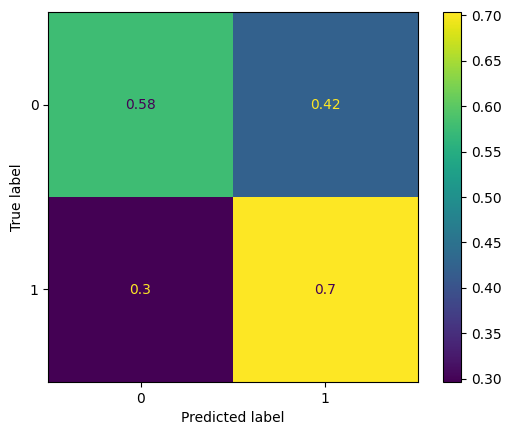

In [ ]:
cf = confusion_matrix(y_test, y_pre, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cf)
disp.plot()